In [1]:
print("Loading data...")

Loading data...


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib
import streamlit as st

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer


In [3]:
df=pd.read_csv("/Users/apple/Downloads/Project/Synthetic-diabetes-dataset-for-machine-learning/research/diabetes 2.csv")
df.head()

,id,age,gender,bmi,glucose,blood_pressure,cholesterol,heart_rate,sleep_hours,physical_activity,smoking,alcohol_intake,family_history,stress_level,diet_score,steps_per_day,work_hours,water_intake_ltr,insulin,diabetes
0,1,69,Male,23.30,170,137,139,66,6.4,High,1,1,1,8,3,8760,6,3.6,33,0
1,2,32,Male,25.00,184,177,250,75,6.4,Medium,0,1,1,4,7,7682,11,4.1,36,0
2,3,89,Female,28.57,87,164,225,102,7.5,Medium,1,0,0,6,5,15025,8,1.4,46,1
3,4,78,Male,15.85,96,113,158,112,6.9,Low,0,1,1,2,7,4645,4,4.4,171,1
4,5,38,Female,35.74,171,122,193,109,7.4,Medium,0,1,0,6,9,7862,13,3.9,235,0


In [4]:
df.shape

(10000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   gender             10000 non-null  object 
 3   bmi                10000 non-null  float64
 4   glucose            10000 non-null  int64  
 5   blood_pressure     10000 non-null  int64  
 6   cholesterol        10000 non-null  int64  
 7   heart_rate         10000 non-null  int64  
 8   sleep_hours        10000 non-null  float64
 9   physical_activity  10000 non-null  object 
 10  smoking            10000 non-null  int64  
 11  alcohol_intake     10000 non-null  int64  
 12  family_history     10000 non-null  int64  
 13  stress_level       10000 non-null  int64  
 14  diet_score         10000 non-null  int64  
 15  steps_per_day      10000 non-null  int64  
 16  work_hours         1000

In [6]:
df.isna().sum()

id                   0
age                  0
gender               0
bmi                  0
glucose              0
blood_pressure       0
cholesterol          0
heart_rate           0
sleep_hours          0
physical_activity    0
smoking              0
alcohol_intake       0
family_history       0
stress_level         0
diet_score           0
steps_per_day        0
work_hours           0
water_intake_ltr     0
insulin              0
diabetes             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True, dtype=int)

In [9]:
df.head()

,id,age,bmi,glucose,blood_pressure,cholesterol,heart_rate,sleep_hours,physical_activity,smoking,alcohol_intake,family_history,stress_level,diet_score,steps_per_day,work_hours,water_intake_ltr,insulin,diabetes,gender_Male
0,1,69,23.30,170,137,139,66,6.4,High,1,1,1,8,3,8760,6,3.6,33,0,1
1,2,32,25.00,184,177,250,75,6.4,Medium,0,1,1,4,7,7682,11,4.1,36,0,1
2,3,89,28.57,87,164,225,102,7.5,Medium,1,0,0,6,5,15025,8,1.4,46,1,0
3,4,78,15.85,96,113,158,112,6.9,Low,0,1,1,2,7,4645,4,4.4,171,1,1
4,5,38,35.74,171,122,193,109,7.4,Medium,0,1,0,6,9,7862,13,3.9,235,0,0


In [10]:
df['physical_activity'].value_counts()

physical_activity
Low       3366
High      3348
Medium    3286
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
df[["physical_activity"]] = encoder.fit_transform(df[["physical_activity"]])


In [12]:
df.head()

,id,age,bmi,glucose,blood_pressure,cholesterol,heart_rate,sleep_hours,physical_activity,smoking,alcohol_intake,family_history,stress_level,diet_score,steps_per_day,work_hours,water_intake_ltr,insulin,diabetes,gender_Male
0,1,69,23.30,170,137,139,66,6.4,2.0,1,1,1,8,3,8760,6,3.6,33,0,1
1,2,32,25.00,184,177,250,75,6.4,1.0,0,1,1,4,7,7682,11,4.1,36,0,1
2,3,89,28.57,87,164,225,102,7.5,1.0,1,0,0,6,5,15025,8,1.4,46,1,0
3,4,78,15.85,96,113,158,112,6.9,0.0,0,1,1,2,7,4645,4,4.4,171,1,1
4,5,38,35.74,171,122,193,109,7.4,1.0,0,1,0,6,9,7862,13,3.9,235,0,0


In [13]:
df.shape

(10000, 20)

In [15]:

outliers = {}

for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
    outliers[col] = outlier_rows.index.tolist()  # storing indices of outliers

# Example: print outliers for a column
for col, inds in outliers.items():
    print(f"{col} has outliers at indices: {inds}")

id has outliers at indices: []
age has outliers at indices: []
bmi has outliers at indices: [33, 127, 132, 201, 220, 252, 324, 343, 395, 708, 899, 1000, 1266, 1378, 1599, 2132, 2235, 2241, 2279, 2285, 2362, 2570, 2809, 2855, 3292, 3330, 3348, 3393, 3970, 4078, 4441, 4448, 4701, 5407, 5505, 5540, 6099, 6242, 6464, 6483, 6492, 7303, 7392, 7558, 7606, 7668, 7846, 7892, 7895, 8006, 8273, 8309, 8454, 8751, 8799, 8868, 8924, 9217, 9228, 9402, 9480, 9637, 9706, 9852]
glucose has outliers at indices: []
blood_pressure has outliers at indices: []
cholesterol has outliers at indices: []
heart_rate has outliers at indices: []
sleep_hours has outliers at indices: []
physical_activity has outliers at indices: []
smoking has outliers at indices: []
alcohol_intake has outliers at indices: []
family_history has outliers at indices: []
stress_level has outliers at indices: []
diet_score has outliers at indices: []
steps_per_day has outliers at indices: []
work_hours has outliers at indices: []
water_in

In [16]:
df.columns

Index(['id', 'age', 'bmi', 'glucose', 'blood_pressure', 'cholesterol',
       'heart_rate', 'sleep_hours', 'physical_activity', 'smoking',
       'alcohol_intake', 'family_history', 'stress_level', 'diet_score',
       'steps_per_day', 'work_hours', 'water_intake_ltr', 'insulin',
       'diabetes', 'gender_Male'],
      dtype='object')

In [17]:
df=df.drop(['id'], axis=1)

In [18]:
df.head()

,age,bmi,glucose,blood_pressure,cholesterol,heart_rate,sleep_hours,physical_activity,smoking,alcohol_intake,family_history,stress_level,diet_score,steps_per_day,work_hours,water_intake_ltr,insulin,diabetes,gender_Male
0,69,23.30,170,137,139,66,6.4,2.0,1,1,1,8,3,8760,6,3.6,33,0,1
1,32,25.00,184,177,250,75,6.4,1.0,0,1,1,4,7,7682,11,4.1,36,0,1
2,89,28.57,87,164,225,102,7.5,1.0,1,0,0,6,5,15025,8,1.4,46,1,0
3,78,15.85,96,113,158,112,6.9,0.0,0,1,1,2,7,4645,4,4.4,171,1,1
4,38,35.74,171,122,193,109,7.4,1.0,0,1,0,6,9,7862,13,3.9,235,0,0


In [22]:
df.columns

Index(['age', 'bmi', 'glucose', 'blood_pressure', 'cholesterol', 'heart_rate',
       'sleep_hours', 'physical_activity', 'smoking', 'alcohol_intake',
       'family_history', 'stress_level', 'diet_score', 'steps_per_day',
       'work_hours', 'water_intake_ltr', 'insulin', 'diabetes', 'gender_Male'],
      dtype='object')

In [23]:
import pandas as pd

# Assuming your DataFrame is called df
numeric_cols = ['age', 'bmi', 'glucose', 'blood_pressure', 'cholesterol', 'heart_rate',
       'sleep_hours', 'physical_activity', 'smoking', 'alcohol_intake',
       'family_history', 'stress_level', 'diet_score', 'steps_per_day',
       'work_hours', 'water_intake_ltr', 'insulin', 'diabetes', 'gender_Male']

# Remove outliers using IQR
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

clean_df = remove_outliers(df, numeric_cols)


In [24]:
clean_df.shape

(9936, 19)

In [32]:
x=clean_df.drop('diabetes', axis=1)
y=clean_df['diabetes']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


Accuracy: 0.4940
F1 Score: 0.4797

Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.66      0.56       986
           1       0.50      0.33      0.40      1002

    accuracy                           0.49      1988
   macro avg       0.49      0.50      0.48      1988
weighted avg       0.49      0.49      0.48      1988



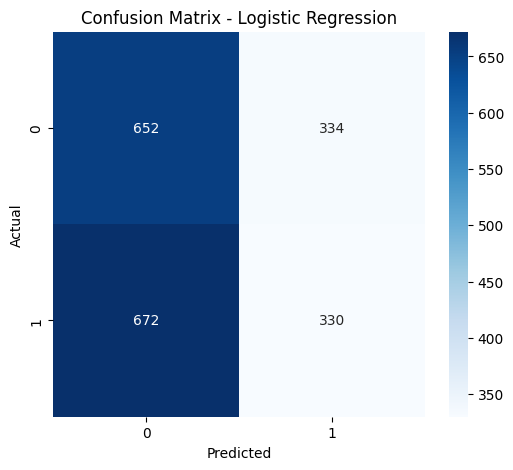

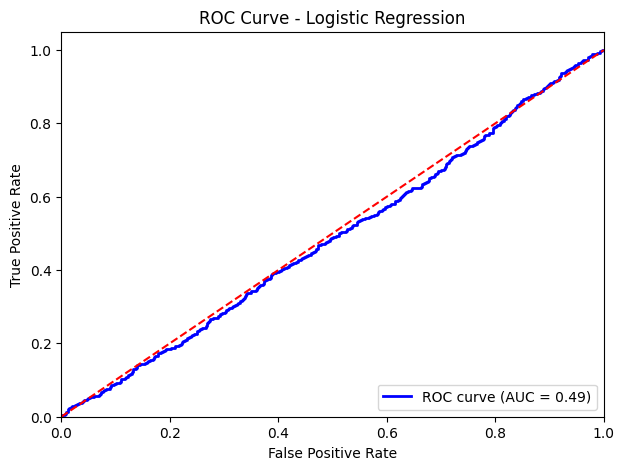

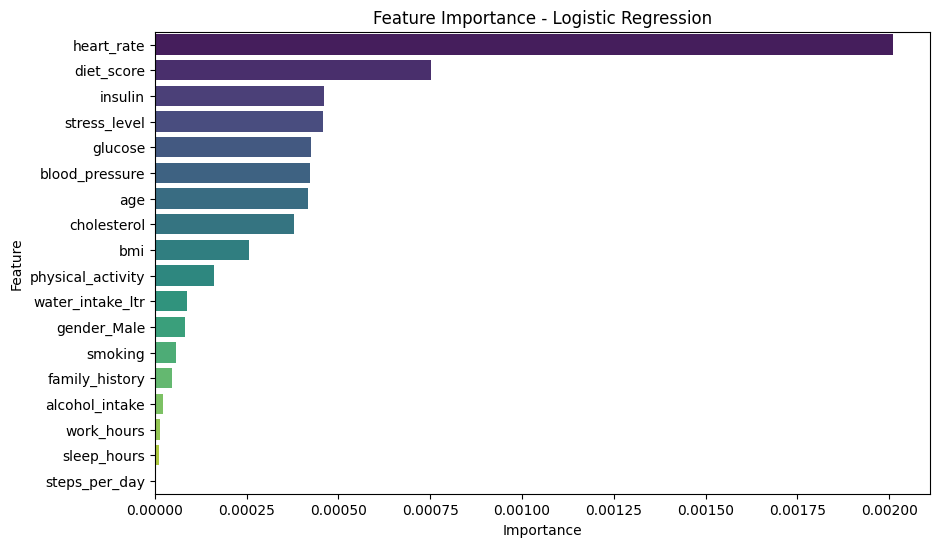

In [33]:
# 1️⃣ Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# 2️⃣ Initialize Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)  # increase max_iter if it doesn't converge
lr.fit(X_train, y_train)

# 3️⃣ Predictions
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# 4️⃣ Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6️⃣ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# 7️⃣ Feature Importance (Coefficients)
feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': lr.coef_[0]})
feat_imp['Importance'] = feat_imp['Importance'].abs()  # optional: take absolute values
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Feature Importance - Logistic Regression")
plt.show()


Accuracy: 0.4864
F1 Score: 0.4825

Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.57      0.53       986
           1       0.49      0.40      0.44      1002

    accuracy                           0.49      1988
   macro avg       0.49      0.49      0.48      1988
weighted avg       0.49      0.49      0.48      1988



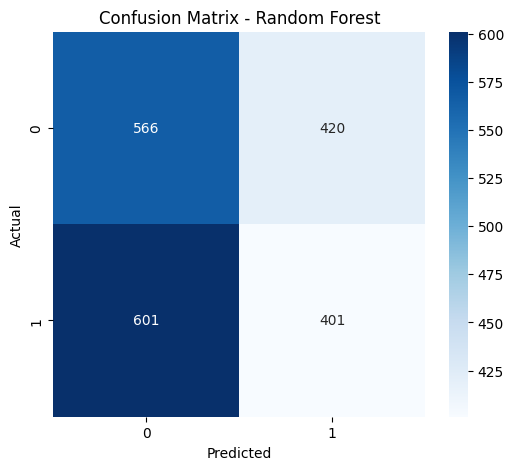

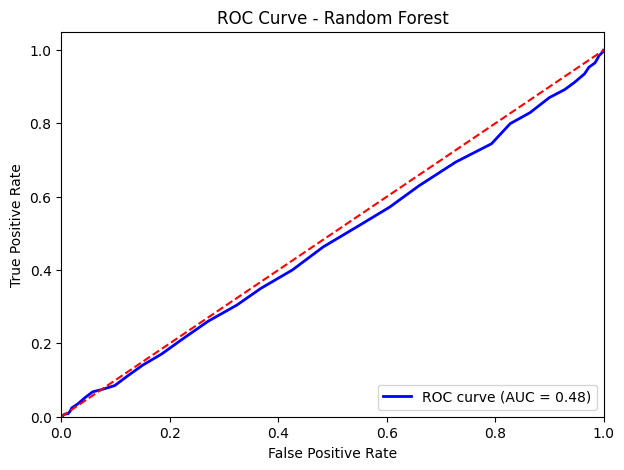

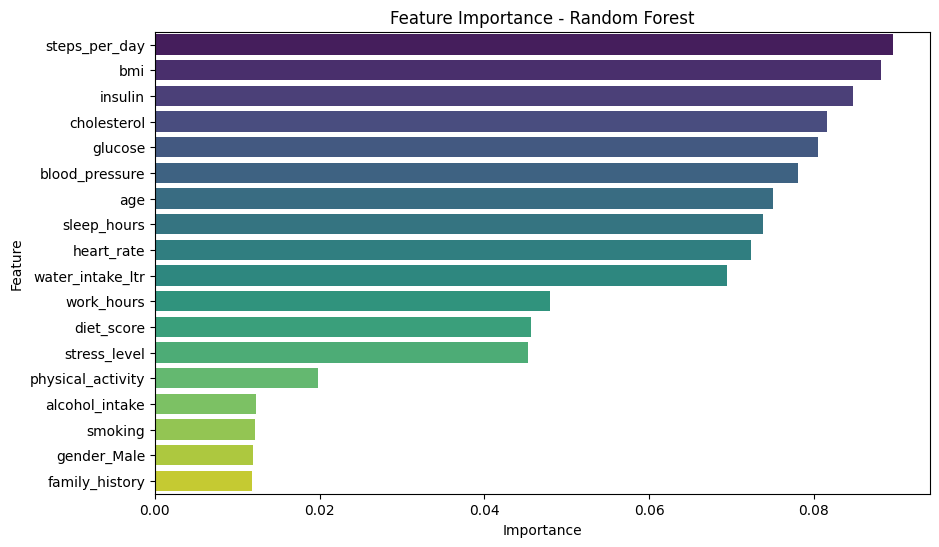

In [34]:
# 1️⃣ Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# 2️⃣ Initialize Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)  # n_estimators can be increased for better performance
rf.fit(X_train, y_train)

# 3️⃣ Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# 4️⃣ Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6️⃣ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# 7️⃣ Feature Importance
feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.show()


In [39]:

outliers = {}

for col in clean_df:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_rows = clean_df[(clean_df[col] < lower) | (clean_df[col] > upper)]
    outliers[col] = outlier_rows.index.tolist()  # storing indices of outliers

# Example: print outliers for a column
for col, inds in outliers.items():
    print(f"{col} has outliers at indices: {inds}")

age has outliers at indices: []
bmi has outliers at indices: [757, 1193, 1626, 2358, 4264, 6195, 6657, 7446, 8721, 9635]
glucose has outliers at indices: []
blood_pressure has outliers at indices: []
cholesterol has outliers at indices: []
heart_rate has outliers at indices: []
sleep_hours has outliers at indices: []
physical_activity has outliers at indices: []
smoking has outliers at indices: []
alcohol_intake has outliers at indices: []
family_history has outliers at indices: []
stress_level has outliers at indices: []
diet_score has outliers at indices: []
steps_per_day has outliers at indices: []
work_hours has outliers at indices: []
water_intake_ltr has outliers at indices: []
insulin has outliers at indices: []
diabetes has outliers at indices: []
gender_Male has outliers at indices: []


In [40]:
import pandas as pd

# Assuming your DataFrame is called df
numeric_cols = [ 'bmi']

# Remove outliers using IQR
def remove_outliers(clean_df, cols):
    for col in cols:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df1 = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]
    return clean_df

df1 = remove_outliers(clean_df, numeric_cols)

In [43]:
df1.shape

(9936, 19)